In [46]:
#importing libraries

import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import log_loss

In [47]:
#reading the data

data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')

In [48]:
data1.head(500)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePriceCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Medium
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Low
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Medium
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Low
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Medium
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,Low
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,Medium
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,Medium
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,Low
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,Low


In [49]:
#checking for missing values

print(data1.apply(lambda x: sum(x.isnull())))
print(data1.apply(lambda x: len(x.unique())))

Id                      0
MSSubClass              0
MSZoning                0
LotFrontage           259
LotArea                 0
Street                  0
Alley                1369
LotShape                0
LandContour             0
Utilities               0
LotConfig               0
LandSlope               0
Neighborhood            0
Condition1              0
Condition2              0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
RoofStyle               0
RoofMatl                0
Exterior1st             0
Exterior2nd             0
MasVnrType              8
MasVnrArea              8
ExterQual               0
ExterCond               0
Foundation              0
BsmtQual               37
BsmtCond               37
BsmtExposure           38
BsmtFinType1           37
BsmtFinSF1              0
BsmtFinType2           38
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF 

In [50]:
#looking at the data
data1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [51]:
#Checking the independent variables
data1.columns.tolist()
pd.set_option('display.max_rows', 500)
data1.dtypes

Id                     int64
MSSubClass             int64
MSZoning              object
LotFrontage          float64
LotArea                int64
Street                object
Alley                 object
LotShape              object
LandContour           object
Utilities             object
LotConfig             object
LandSlope             object
Neighborhood          object
Condition1            object
Condition2            object
BldgType              object
HouseStyle            object
OverallQual            int64
OverallCond            int64
YearBuilt              int64
YearRemodAdd           int64
RoofStyle             object
RoofMatl              object
Exterior1st           object
Exterior2nd           object
MasVnrType            object
MasVnrArea           float64
ExterQual             object
ExterCond             object
Foundation            object
BsmtQual              object
BsmtCond              object
BsmtExposure          object
BsmtFinType1          object
BsmtFinSF1    

In [52]:
print(data1.isnull().sum())
print(data2.isnull().sum())

Id                      0
MSSubClass              0
MSZoning                0
LotFrontage           259
LotArea                 0
Street                  0
Alley                1369
LotShape                0
LandContour             0
Utilities               0
LotConfig               0
LandSlope               0
Neighborhood            0
Condition1              0
Condition2              0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
RoofStyle               0
RoofMatl                0
Exterior1st             0
Exterior2nd             0
MasVnrType              8
MasVnrArea              8
ExterQual               0
ExterCond               0
Foundation              0
BsmtQual               37
BsmtCond               37
BsmtExposure           38
BsmtFinType1           37
BsmtFinSF1              0
BsmtFinType2           38
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF 

In [53]:
#dropping the unnecessary variables

data1 = data1.drop("MiscFeature",1)    #this column had 1406 missing values, hence makes no sense to include it
data2 = data2.drop("MiscFeature",1)    #this column had 1408 missing values, hence makes no sense to include it

data1 = data1.drop("Id",1)   #unique id for all the observations, hence no input to the model
data2 = data2.drop("Id",1)

## We shouldn't drop the categorical features with missing values, since its relation with the target value is not measured by the pearson correlation (this only measure relation between numeric features). Hence, we shouldn't assume they are not important. 

In [54]:
#imputing None in all the missing values for the variables where things may not be present in the house

columns = ['PoolQC', 'Alley','Fence','FireplaceQu','GarageCond', 'GarageQual','GarageFinish','GarageType',
           'BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtQual','BsmtCond','MasVnrType']
for i in columns:
    data1[i] = data1[i].fillna('None')
    data2[i] = data2[i].fillna('None')

In [55]:
#imputing Mode in all the missing values for the categorical variables due to high chances of occurrences

columns = ['Electrical','MSZoning','Functional','Utilities','BsmtHalfBath','BsmtFullBath','BsmtFinSF2',
           'BsmtUnfSF','TotalBsmtSF','SaleType','BsmtFinSF1','GarageCars','GarageArea']
for i in columns:
    data1[i] = data1[i].fillna(data1[i].mode()[0])
    data2[i] = data2[i].fillna(data2[i].mode()[0])

In [56]:
#imputing 0 in all the missing values for the a few variables representing the absence in house

print(data1['GarageYrBlt'].value_counts())
data1['GarageYrBlt'] = data1['GarageYrBlt'].fillna(0)
data2['GarageYrBlt'] = data2['GarageYrBlt'].fillna(0)

print(data1['MasVnrArea'].value_counts())
data1['MasVnrArea'] = data1['MasVnrArea'].fillna(0)
data2['MasVnrArea'] = data2['MasVnrArea'].fillna(0)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [57]:
#imputing mean in all the missing values for the numerical variables representing its occurrence

print(data1['LotFrontage'].unique())
print(data1['LotFrontage'].value_counts())
data1['LotFrontage'] = data1['LotFrontage'].fillna(data1['LotFrontage'].mean())
data2['LotFrontage'] = data2['LotFrontage'].fillna(data2['LotFrontage'].mean())

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0   

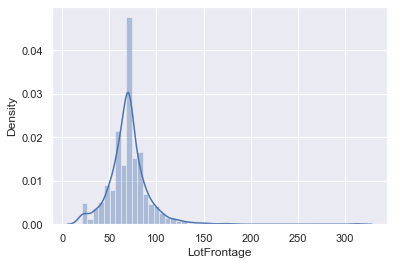

In [58]:
#looking at the distribution to see the imputation and behaviour

sns.distplot(data1['LotFrontage'])
plt.show()

In [59]:
#confirming if there are any missing values left

print(data2.isnull().sum())
print(data1.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<AxesSubplot:>

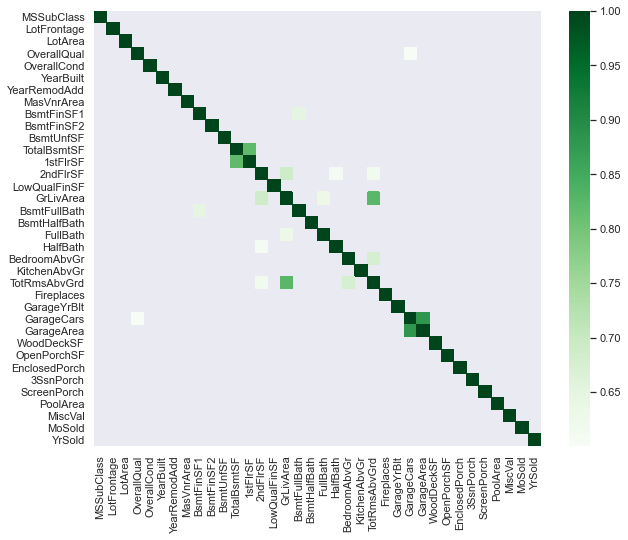

In [60]:
#Checking the correlation between the columns which have correlation more than 0.6 or less than -0.6
#Heatmap
corr = data1.corr().abs()
kot = corr[corr>=0.6]
plt.figure(figsize=(10,8))
sns.heatmap(kot, cmap='Greens')

In [61]:
#label encoding the target variable to convert it into 4 classes
label_encoder = preprocessing.LabelEncoder()
data1['SalePriceCategory']= label_encoder.fit_transform(data1['SalePriceCategory']) 
data1['SalePriceCategory'].unique() 

array([2, 1, 0, 3])

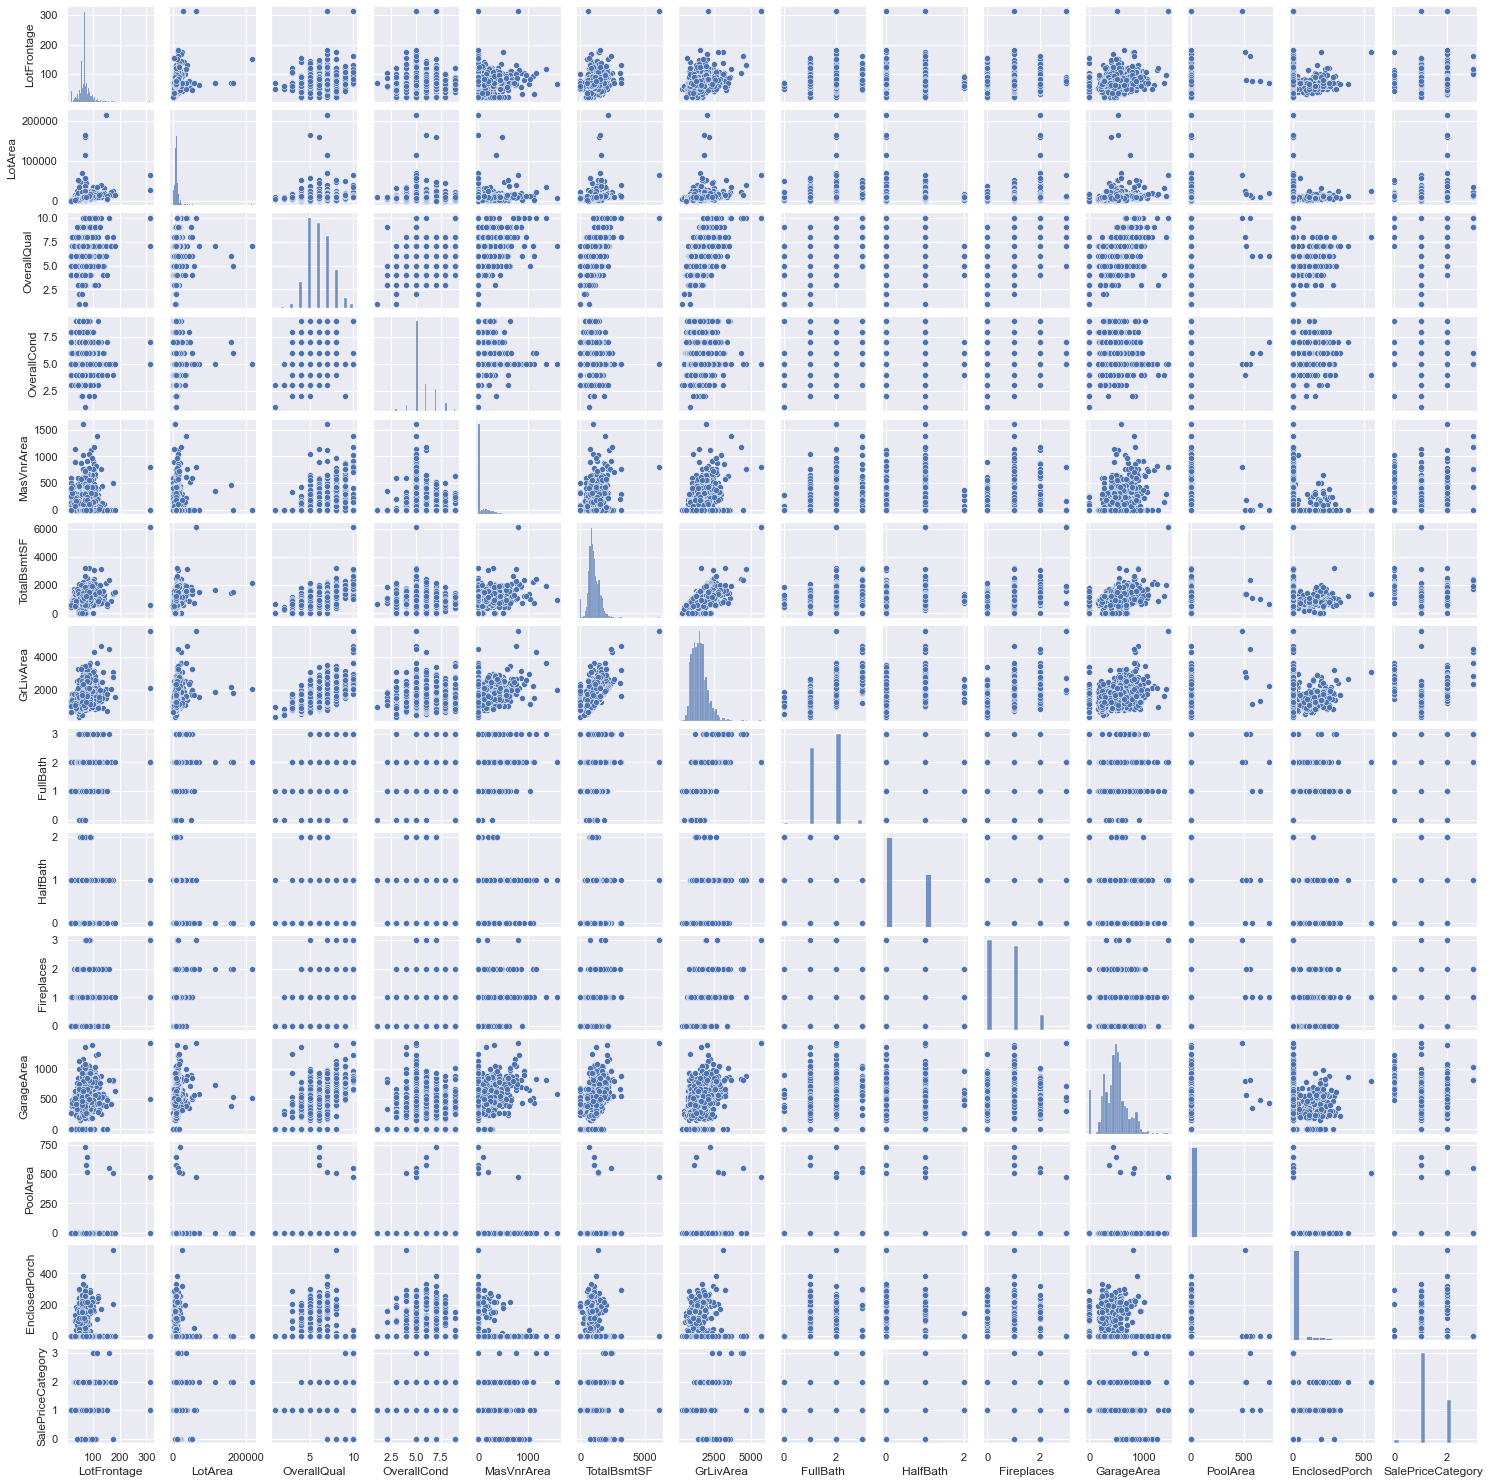

In [62]:
#Making pairplot to visualize the distributions and outliers
sns.set()
#plt.figure(figsize=(10,5))
# plt.title("Distribution Plot of SalePrice")
cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
        'FullBath','HalfBath','Fireplaces','GarageArea','PoolArea','EnclosedPorch','SalePriceCategory']
pairp = sns.pairplot(data1[cols], size = 1.5)
plt.show();

Text(0.5, 1.0, 'Correlation with Sale Price category')

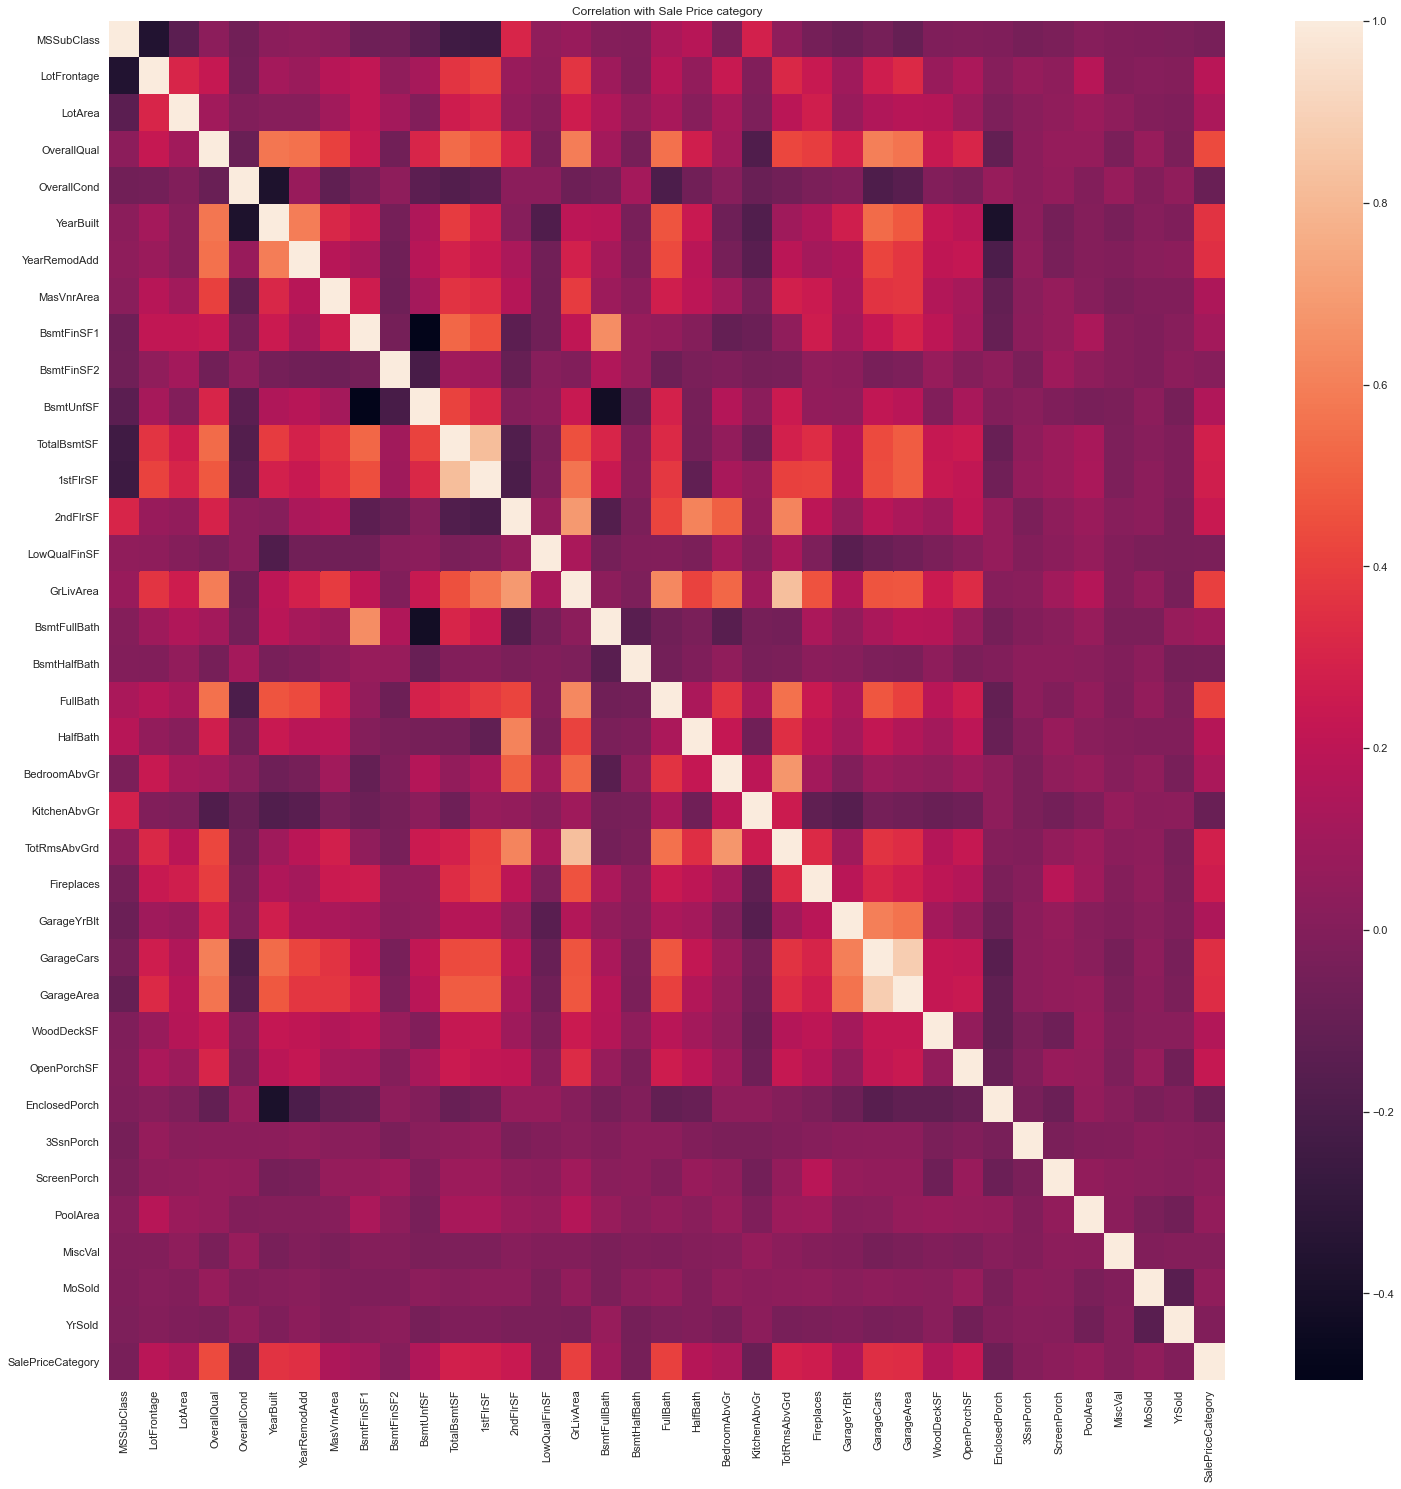

In [63]:
#general heatmap
cdf = data1.corr()
plt.figure(figsize=(25,25))
sns.heatmap(cdf)
plt.title("Correlation with Sale Price category")

In [64]:
#storing the target variable into a temporary variable for future use
a = data1['SalePriceCategory']

#dropping the target variable from data
data1.drop(['SalePriceCategory'],axis=1,inplace=True)

In [65]:
#Due to difference in categories in the training and test dataset, we are first merging the train and test data
#for proper encoding

#making a new column "source" to denote the origin of the obervation in the concatenated dataset "data"
data1['source']='train'
data2['source']='test'
data = pd.concat([data1, data2],ignore_index=True)

#checking the data
print(data.columns.tolist())
print(data['source'])

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [66]:
#printing all the categorical variables for which we need to do the encoding
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['source']]
print(categorical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']


In [67]:
#Doing one hot encoding for the above categorical variables
data = pd.get_dummies(data, columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                                       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                                       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
                                       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                                       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                                       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                                       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 
                                       'SaleCondition'])
print(data.dtypes)

MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
BsmtFinSF1               float64
BsmtFinSF2               float64
BsmtUnfSF                float64
TotalBsmtSF              float64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath             float64
BsmtHalfBath             float64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars               float64
GarageArea               float64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPorch              int64
3SsnPorch 

In [68]:
#After the encoding is done, now splitting the data into train and test dataset again by the source column
data1 = data.loc[data['source']=="train"]
data2 = data.loc[data['source']=="test"]

In [69]:
#dropping the source column
data2.drop(['source'],axis=1,inplace=True)
data1.drop(['source'],axis=1,inplace=True)

In [70]:
#making the train data complete by adding the target variable using the temporary variable after encoding
data1['SalePriceCategory'] = a

In [71]:
#chaceking the train/test data size
print(data1.shape)
print(data2.shape)

(1460, 298)
(1459, 297)


In [72]:
#making the X and y datasets for training the model
X=data1.drop("SalePriceCategory",1)
y=data1[["SalePriceCategory"]]

In [73]:
#Splitting the dataset to check the performance
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)

In [74]:
#scaling the data for better results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
#training the model using Random Forest and XGBoost Classifier with some hyperparameters
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

classifier1 = XGBClassifier()
classifier1.fit(X_train, y_train)

[04:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
#predicting for the validation set and checking the accuracy using both the classifiers
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

y_pred1 = classifier1.predict(X_test)
print(accuracy_score(y_test, y_pred1))

0.910958904109589
0.9041095890410958


In [77]:
#chacking the k fold cross validation score and the standard deviation for stronger interpretations
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("K FOlD Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("K FOlD Accuracy XGB: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation XGB: {:.2f} %".format(accuracies.std()*100))

K FOlD Accuracy: 90.49 %
Standard Deviation: 1.76 %
[04:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:04:32] WARN

In [78]:
#No missing values in the data
train_data_cat_missing = pd.DataFrame(data1.isna().sum().sort_values(ascending = False), 
                                      columns=['missing_cat_total'])
test_data_cat_missing = pd.DataFrame(data2.isna().sum().sort_values(ascending = False), 
                                     columns = ['missing_cat_total'])
print(train_data_cat_missing)
print( '-' * 40)
print(test_data_cat_missing)

                       missing_cat_total
SalePriceCategory                      0
Condition1_PosN                        0
Condition1_RRAn                        0
Condition1_RRNe                        0
Condition1_RRNn                        0
Condition2_Artery                      0
Condition2_Feedr                       0
Condition2_Norm                        0
Condition2_PosA                        0
Condition2_PosN                        0
Condition2_RRAe                        0
Condition2_RRAn                        0
Condition2_RRNn                        0
BldgType_1Fam                          0
BldgType_2fmCon                        0
BldgType_Duplex                        0
BldgType_Twnhs                         0
Condition1_RRAe                        0
Condition1_PosA                        0
Neighborhood_MeadowV                   0
Condition1_Norm                        0
Neighborhood_NAmes                     0
Neighborhood_NPkVill                   0
Neighborhood_NWA

In [79]:
#scaling the test data
data2 = sc.transform(data2)

#predicting for the test data
y_p = classifier.predict(data2)

res = pd.DataFrame(y_p)
res.head()

y_p1 = classifier1.predict(data2)

res1 = pd.DataFrame(y_p1)
res1.head()

,0
0,1
1,1
2,2
3,2
4,1


In [82]:
#Checking the top best features using feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))

                    Specs          Score
2                 LotArea  680509.084090
15              GrLivArea  108973.656782
7              MasVnrArea   80786.705549
13               2ndFlrSF   77323.386568
11            TotalBsmtSF   75669.693841
8              BsmtFinSF1   61602.040262
12               1stFlrSF   54371.086982
26             GarageArea   41817.695763
10              BsmtUnfSF   29616.187032
32               PoolArea   21861.730271
27             WoodDeckSF   21040.616867
28            OpenPorchSF   13923.319835
24            GarageYrBlt    5615.883868
29          EnclosedPorch    2247.850905
33                MiscVal    1946.259565
31            ScreenPorch    1539.035272
30              3SsnPorch    1161.140890
9              BsmtFinSF2     849.768562
1             LotFrontage     790.524834
14           LowQualFinSF     724.893108
0              MSSubClass     391.369993
168          ExterQual_Ex     366.136915
183           BsmtQual_Ex     330.376259
230        Kitch